📊 Real-Time Application Performance Monitoring System

📊 Generating application performance metrics...
  ✓ Generated 1440 metric data points

🔍 Generating transaction traces...
  ✓ Generated 1000 transaction traces

🤖 Detecting performance anomalies...
  ✓ Detected 72 performance anomalies

🔍 Identifying performance bottlenecks...
  ✓ Identified 2 bottlenecks

💡 Generating optimization recommendations...
  ✓ Generated 1 recommendations

🏥 Calculating application health score...
  ✓ Health Score: 87.44/100

📊 APPLICATION PERFORMANCE MONITORING REPORT

⚡ PERFORMANCE METRICS
--------------------------------------------------------------------------------
Average Response Time:          149.02 ms
P50 Response Time:              126.06 ms
P95 Response Time:              307.61 ms
P99 Response Time:              562.81 ms
Average Throughput:             10.83 req/sec
Average Apdex Score:            0.689

💻 RESOURCE UTILIZATION
----------------------------------------------------------------

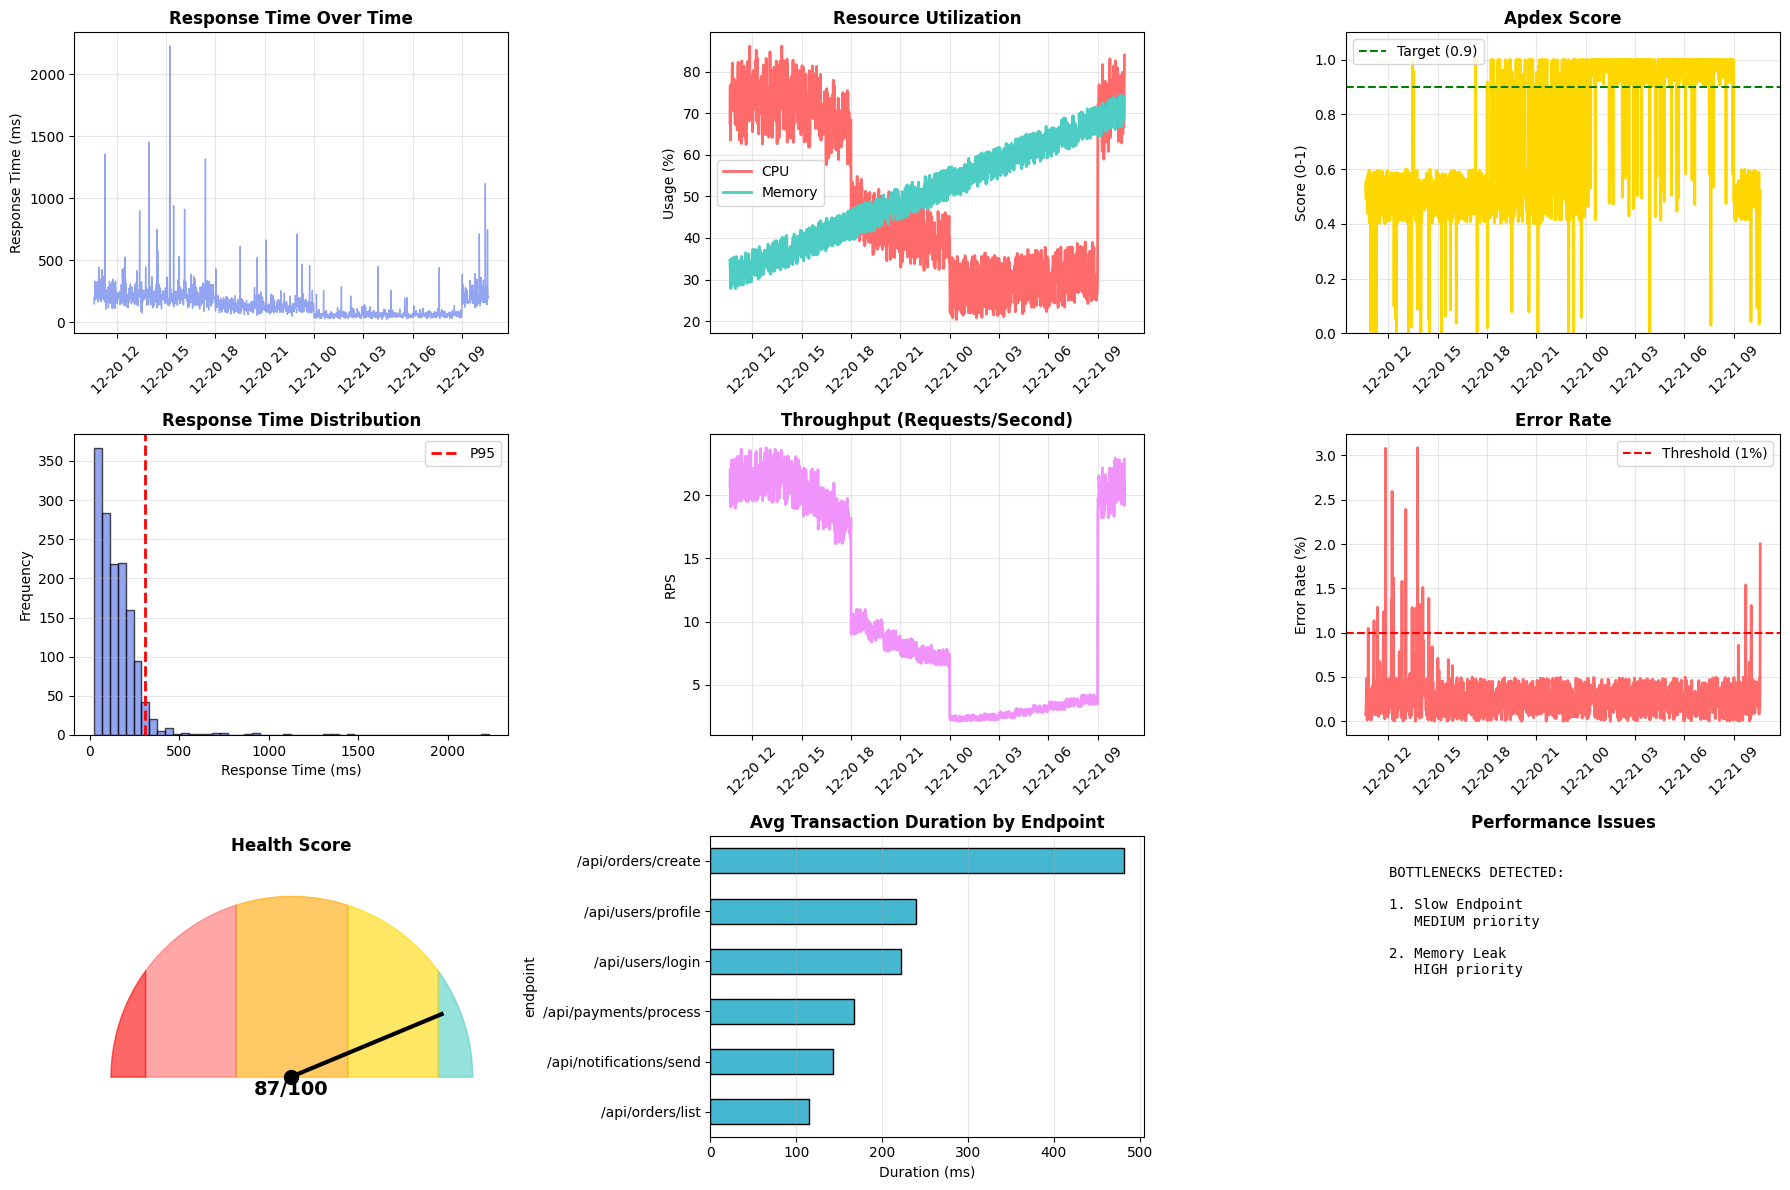


✅ APM analysis complete!

📊 SUMMARY:
  Metrics Collected: 1440
  Transactions Traced: 1000
  Anomalies Detected: 72
  Bottlenecks Found: 2
  Health Score: 87.44/100
  Recommendations: 1


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

class APMMonitoringSystem:
    def __init__(self):
        self.anomaly_detector = IsolationForest(contamination=0.05, random_state=42)
        self.scaler = StandardScaler()
        self.metrics_data = None
        self.transactions = None
        self.bottlenecks = []
        self.anomalies = []
        self.recommendations = []
        self.health_score = 0

    def generate_performance_metrics(self, hours=24, interval_seconds=60):
        """Generate realistic application performance metrics"""
        print("\n📊 Generating application performance metrics...")

        total_points = hours * 3600 // interval_seconds
        timestamps = pd.date_range(
            end=datetime.now(),
            periods=total_points,
            freq=f'{interval_seconds}S'
        )

        metrics = []

        for i, ts in enumerate(timestamps):
            hour = ts.hour

            # Simulate daily traffic patterns
            if 9 <= hour <= 17:  # Business hours
                base_traffic = 1000
                base_response_time = 150
            elif 18 <= hour <= 23:  # Evening
                base_traffic = 600
                base_response_time = 100
            else:  # Night
                base_traffic = 200
                base_response_time = 50

            # Add realistic variations
            traffic_factor = 1 + 0.3 * np.sin((hour - 6) * np.pi / 12)
            traffic = base_traffic * traffic_factor * np.random.uniform(0.9, 1.1)

            # Response time correlates with traffic
            response_time = base_response_time + (traffic / 1000) * 50
            response_time *= np.random.lognormal(0, 0.3)

            # Simulate occasional slowdowns
            if np.random.random() < 0.02:  # 2% chance of slowdown
                response_time *= np.random.uniform(3, 6)

            # CPU usage correlates with traffic
            cpu_usage = min(95, 20 + (traffic / 1500) * 60 + np.random.uniform(-5, 10))

            # Memory usage gradually increases (memory leak simulation)
            memory_baseline = 30 + (i / total_points) * 40
            memory_usage = memory_baseline + np.random.uniform(-3, 5)

            # Database query time
            db_query_time = response_time * 0.6 + np.random.uniform(-20, 20)

            # Error rate increases with high load
            if cpu_usage > 80:
                error_rate = (cpu_usage - 80) * 0.5
            else:
                error_rate = np.random.uniform(0, 0.5)

            # Throughput (requests per second)
            throughput = traffic / 60

            # Apdex score (0-1, where 1 is perfect)
            if response_time < 100:
                apdex = 1.0
            elif response_time < 400:
                apdex = 0.5
            else:
                apdex = 0.0

            apdex += np.random.uniform(-0.1, 0.1)
            apdex = max(0, min(1, apdex))

            metrics.append({
                'timestamp': ts,
                'requests_per_minute': round(traffic, 1),
                'response_time_ms': round(response_time, 2),
                'cpu_usage_percent': round(cpu_usage, 2),
                'memory_usage_percent': round(memory_usage, 2),
                'db_query_time_ms': round(max(10, db_query_time), 2),
                'error_rate_percent': round(max(0, error_rate), 3),
                'throughput_rps': round(throughput, 2),
                'apdex_score': round(apdex, 3),
                'hour': hour
            })

        self.metrics_data = pd.DataFrame(metrics)
        print(f"  ✓ Generated {len(metrics)} metric data points")
        return self.metrics_data

    def generate_transaction_traces(self, count=1000):
        """Generate distributed transaction traces"""
        print("\n🔍 Generating transaction traces...")

        services = ['api-gateway', 'auth-service', 'user-service',
                   'order-service', 'payment-service', 'notification-service']

        endpoints = [
            '/api/users/login',
            '/api/users/profile',
            '/api/orders/create',
            '/api/orders/list',
            '/api/payments/process',
            '/api/notifications/send'
        ]

        traces = []

        for i in range(count):
            trace_id = f'trace_{i:06d}'
            endpoint = np.random.choice(endpoints)
            timestamp = datetime.now() - timedelta(hours=np.random.uniform(0, 24))

            # Root span (API Gateway)
            total_duration = 0
            spans = []

            # API Gateway
            gateway_duration = np.random.uniform(5, 15)
            spans.append({
                'trace_id': trace_id,
                'span_id': f'{trace_id}_0',
                'service': 'api-gateway',
                'operation': endpoint,
                'duration_ms': gateway_duration,
                'timestamp': timestamp
            })
            total_duration += gateway_duration

            # Downstream services based on endpoint
            if 'login' in endpoint:
                # Auth service
                auth_duration = np.random.uniform(50, 150)
                spans.append({
                    'trace_id': trace_id,
                    'span_id': f'{trace_id}_1',
                    'service': 'auth-service',
                    'operation': 'authenticate',
                    'duration_ms': auth_duration,
                    'timestamp': timestamp
                })
                total_duration += auth_duration

            elif 'profile' in endpoint:
                # User service with DB call
                user_duration = np.random.uniform(30, 80)
                db_duration = np.random.uniform(20, 60)
                spans.extend([{
                    'trace_id': trace_id,
                    'span_id': f'{trace_id}_1',
                    'service': 'user-service',
                    'operation': 'get_user',
                    'duration_ms': user_duration,
                    'timestamp': timestamp
                }, {
                    'trace_id': trace_id,
                    'span_id': f'{trace_id}_2',
                    'service': 'database',
                    'operation': 'SELECT users',
                    'duration_ms': db_duration,
                    'timestamp': timestamp
                }])
                total_duration += user_duration + db_duration

            elif 'orders/create' in endpoint:
                # Complex flow: user → order → payment → notification
                services_chain = [
                    ('user-service', 'verify_user', np.random.uniform(20, 50)),
                    ('order-service', 'create_order', np.random.uniform(40, 100)),
                    ('payment-service', 'process_payment', np.random.uniform(100, 300)),
                    ('notification-service', 'send_confirmation', np.random.uniform(30, 80))
                ]

                for idx, (svc, op, dur) in enumerate(services_chain, 1):
                    spans.append({
                        'trace_id': trace_id,
                        'span_id': f'{trace_id}_{idx}',
                        'service': svc,
                        'operation': op,
                        'duration_ms': dur,
                        'timestamp': timestamp
                    })
                    total_duration += dur

            # Add occasional slow database queries
            if np.random.random() < 0.1:  # 10% slow queries
                slow_db = np.random.uniform(500, 2000)
                spans.append({
                    'trace_id': trace_id,
                    'span_id': f'{trace_id}_slow',
                    'service': 'database',
                    'operation': 'slow_query',
                    'duration_ms': slow_db,
                    'timestamp': timestamp
                })
                total_duration += slow_db

            # Store trace metadata
            traces.append({
                'trace_id': trace_id,
                'endpoint': endpoint,
                'total_duration_ms': round(total_duration, 2),
                'span_count': len(spans),
                'timestamp': timestamp,
                'status': 'error' if total_duration > 1000 else 'success'
            })

            # Store individual spans for later analysis
            for span in spans:
                span['total_trace_duration'] = total_duration

        self.transactions = pd.DataFrame(traces)
        print(f"  ✓ Generated {len(traces)} transaction traces")
        return self.transactions

    def detect_performance_anomalies(self):
        """Use ML to detect performance anomalies"""
        print("\n🤖 Detecting performance anomalies...")

        # Prepare features
        features = [
            'response_time_ms', 'cpu_usage_percent', 'memory_usage_percent',
            'db_query_time_ms', 'error_rate_percent', 'throughput_rps'
        ]

        X = self.metrics_data[features].fillna(0)
        X_scaled = self.scaler.fit_transform(X)

        # Detect anomalies
        predictions = self.anomaly_detector.fit_predict(X_scaled)
        anomaly_scores = self.anomaly_detector.score_samples(X_scaled)

        self.metrics_data['is_anomaly'] = predictions == -1
        self.metrics_data['anomaly_score'] = anomaly_scores

        # Extract anomalies
        anomalies = self.metrics_data[self.metrics_data['is_anomaly'] == True].copy()

        # Classify anomaly types
        for idx, row in anomalies.iterrows():
            anomaly_type = []

            if row['response_time_ms'] > self.metrics_data['response_time_ms'].quantile(0.95):
                anomaly_type.append('High Response Time')

            if row['cpu_usage_percent'] > 85:
                anomaly_type.append('High CPU Usage')

            if row['memory_usage_percent'] > 80:
                anomaly_type.append('High Memory Usage')

            if row['error_rate_percent'] > 1:
                anomaly_type.append('High Error Rate')

            if row['db_query_time_ms'] > self.metrics_data['db_query_time_ms'].quantile(0.95):
                anomaly_type.append('Slow Database Queries')

            self.anomalies.append({
                'timestamp': row['timestamp'],
                'type': ', '.join(anomaly_type) if anomaly_type else 'General Anomaly',
                'response_time': row['response_time_ms'],
                'cpu_usage': row['cpu_usage_percent'],
                'memory_usage': row['memory_usage_percent'],
                'severity': 'HIGH' if len(anomaly_type) > 2 else 'MEDIUM'
            })

        print(f"  ✓ Detected {len(self.anomalies)} performance anomalies")
        return self.anomalies

    def identify_bottlenecks(self):
        """Identify performance bottlenecks from transaction traces"""
        print("\n🔍 Identifying performance bottlenecks...")

        # Analyze slow transactions
        slow_threshold = self.transactions['total_duration_ms'].quantile(0.90)
        slow_transactions = self.transactions[
            self.transactions['total_duration_ms'] > slow_threshold
        ]

        # Common patterns in slow transactions
        endpoint_performance = self.transactions.groupby('endpoint').agg({
            'total_duration_ms': ['mean', 'median', 'max', 'count']
        }).round(2)

        # Identify bottlenecks
        for endpoint, stats in endpoint_performance.iterrows():
            avg_duration = stats[('total_duration_ms', 'mean')]
            max_duration = stats[('total_duration_ms', 'max')]
            count = stats[('total_duration_ms', 'count')]

            if avg_duration > 300:  # Slower than 300ms average
                severity = 'HIGH' if avg_duration > 500 else 'MEDIUM'

                self.bottlenecks.append({
                    'type': 'Slow Endpoint',
                    'location': endpoint,
                    'severity': severity,
                    'avg_duration_ms': avg_duration,
                    'max_duration_ms': max_duration,
                    'occurrence_count': int(count),
                    'recommendation': f'Optimize {endpoint} - consider caching or async processing'
                })

        # Database query bottlenecks
        avg_db_time = self.metrics_data['db_query_time_ms'].mean()
        p95_db_time = self.metrics_data['db_query_time_ms'].quantile(0.95)

        if avg_db_time > 100:
            self.bottlenecks.append({
                'type': 'Slow Database Queries',
                'location': 'database',
                'severity': 'HIGH' if avg_db_time > 150 else 'MEDIUM',
                'avg_duration_ms': round(avg_db_time, 2),
                'max_duration_ms': round(p95_db_time, 2),
                'occurrence_count': len(self.metrics_data),
                'recommendation': 'Add database indexes, optimize queries, consider read replicas'
            })

        # Memory leak detection
        memory_trend = np.polyfit(
            range(len(self.metrics_data)),
            self.metrics_data['memory_usage_percent'],
            1
        )[0]

        if memory_trend > 0.01:  # Increasing more than 0.01% per data point
            self.bottlenecks.append({
                'type': 'Memory Leak',
                'location': 'application',
                'severity': 'HIGH',
                'avg_duration_ms': 0,
                'max_duration_ms': 0,
                'occurrence_count': 1,
                'recommendation': 'Investigate memory leak - check for unclosed connections, large object retention'
            })

        print(f"  ✓ Identified {len(self.bottlenecks)} bottlenecks")
        return self.bottlenecks

    def generate_recommendations(self):
        """Generate intelligent performance optimization recommendations"""
        print("\n💡 Generating optimization recommendations...")

        recommendations = []

        # Analyze metrics for recommendations
        avg_response_time = self.metrics_data['response_time_ms'].mean()
        p95_response_time = self.metrics_data['response_time_ms'].quantile(0.95)
        avg_cpu = self.metrics_data['cpu_usage_percent'].mean()
        avg_memory = self.metrics_data['memory_usage_percent'].mean()
        avg_error_rate = self.metrics_data['error_rate_percent'].mean()
        avg_apdex = self.metrics_data['apdex_score'].mean()

        # Response time optimization
        if p95_response_time > 400:
            recommendations.append({
                'category': 'Performance',
                'priority': 'HIGH',
                'issue': f'High P95 response time: {p95_response_time:.0f}ms',
                'recommendation': 'Implement caching layer (Redis/Memcached)',
                'expected_improvement': '40-60% response time reduction',
                'implementation_effort': 'Medium (2-3 days)'
            })

        if avg_response_time > 200:
            recommendations.append({
                'category': 'Performance',
                'priority': 'MEDIUM',
                'issue': f'Average response time: {avg_response_time:.0f}ms',
                'recommendation': 'Enable HTTP/2, use CDN for static assets',
                'expected_improvement': '20-30% response time reduction',
                'implementation_effort': 'Low (4-8 hours)'
            })

        # CPU optimization
        if avg_cpu > 70:
            recommendations.append({
                'category': 'Resources',
                'priority': 'HIGH',
                'issue': f'High CPU usage: {avg_cpu:.1f}%',
                'recommendation': 'Scale horizontally (add more instances) or optimize hot code paths',
                'expected_improvement': 'CPU usage down to 40-50%',
                'implementation_effort': 'Low for scaling (1 hour), High for optimization (1-2 weeks)'
            })

        # Memory optimization
        if avg_memory > 75:
            recommendations.append({
                'category': 'Resources',
                'priority': 'HIGH',
                'issue': f'High memory usage: {avg_memory:.1f}%',
                'recommendation': 'Investigate memory leaks, implement object pooling',
                'expected_improvement': '30-40% memory reduction',
                'implementation_effort': 'High (1-2 weeks)'
            })

        # Error rate
        if avg_error_rate > 1:
            recommendations.append({
                'category': 'Reliability',
                'priority': 'CRITICAL',
                'issue': f'High error rate: {avg_error_rate:.2f}%',
                'recommendation': 'Implement circuit breakers, improve error handling',
                'expected_improvement': 'Error rate below 0.1%',
                'implementation_effort': 'Medium (3-5 days)'
            })

        # Apdex score
        if avg_apdex < 0.8:
            recommendations.append({
                'category': 'User Experience',
                'priority': 'HIGH',
                'issue': f'Low Apdex score: {avg_apdex:.2f}',
                'recommendation': 'Optimize critical user paths, implement performance budgets',
                'expected_improvement': 'Apdex score above 0.9',
                'implementation_effort': 'Medium (1 week)'
            })

        # Database optimization
        avg_db_time = self.metrics_data['db_query_time_ms'].mean()
        if avg_db_time > 100:
            recommendations.append({
                'category': 'Database',
                'priority': 'HIGH',
                'issue': f'Slow database queries: {avg_db_time:.0f}ms average',
                'recommendation': 'Add missing indexes, implement query caching, consider connection pooling',
                'expected_improvement': '50-70% query time reduction',
                'implementation_effort': 'Medium (2-4 days)'
            })

        self.recommendations = recommendations
        print(f"  ✓ Generated {len(recommendations)} recommendations")
        return recommendations

    def calculate_health_score(self):
        """Calculate overall application health score (0-100)"""
        print("\n🏥 Calculating application health score...")

        score = 100

        # Response time penalty
        avg_response = self.metrics_data['response_time_ms'].mean()
        if avg_response > 500:
            score -= 30
        elif avg_response > 300:
            score -= 20
        elif avg_response > 150:
            score -= 10

        # Error rate penalty
        avg_error = self.metrics_data['error_rate_percent'].mean()
        score -= min(25, avg_error * 5)

        # CPU usage penalty
        avg_cpu = self.metrics_data['cpu_usage_percent'].mean()
        if avg_cpu > 85:
            score -= 20
        elif avg_cpu > 70:
            score -= 10

        # Memory usage penalty
        avg_memory = self.metrics_data['memory_usage_percent'].mean()
        if avg_memory > 85:
            score -= 15
        elif avg_memory > 75:
            score -= 8

        # Apdex score bonus/penalty
        avg_apdex = self.metrics_data['apdex_score'].mean()
        score += (avg_apdex - 0.5) * 20

        # Anomaly penalty
        anomaly_rate = len(self.anomalies) / len(self.metrics_data)
        score -= min(15, anomaly_rate * 300)

        self.health_score = max(0, min(100, round(score, 2)))

        print(f"  ✓ Health Score: {self.health_score}/100")
        return self.health_score

    def generate_report(self):
        """Generate comprehensive APM report"""
        print("\n" + "="*80)
        print("📊 APPLICATION PERFORMANCE MONITORING REPORT")
        print("="*80)

        # Performance metrics
        print("\n⚡ PERFORMANCE METRICS")
        print("-" * 80)
        print(f"Average Response Time:          {self.metrics_data['response_time_ms'].mean():.2f} ms")
        print(f"P50 Response Time:              {self.metrics_data['response_time_ms'].quantile(0.50):.2f} ms")
        print(f"P95 Response Time:              {self.metrics_data['response_time_ms'].quantile(0.95):.2f} ms")
        print(f"P99 Response Time:              {self.metrics_data['response_time_ms'].quantile(0.99):.2f} ms")
        print(f"Average Throughput:             {self.metrics_data['throughput_rps'].mean():.2f} req/sec")
        print(f"Average Apdex Score:            {self.metrics_data['apdex_score'].mean():.3f}")

        # Resource utilization
        print("\n💻 RESOURCE UTILIZATION")
        print("-" * 80)
        print(f"Average CPU Usage:              {self.metrics_data['cpu_usage_percent'].mean():.2f}%")
        print(f"Peak CPU Usage:                 {self.metrics_data['cpu_usage_percent'].max():.2f}%")
        print(f"Average Memory Usage:           {self.metrics_data['memory_usage_percent'].mean():.2f}%")
        print(f"Peak Memory Usage:              {self.metrics_data['memory_usage_percent'].max():.2f}%")

        # Errors and anomalies
        print("\n🔍 ANOMALIES & ERRORS")
        print("-" * 80)
        print(f"Anomalies Detected:             {len(self.anomalies)}")
        print(f"Error Rate:                     {self.metrics_data['error_rate_percent'].mean():.3f}%")
        print(f"Database Query Time (Avg):      {self.metrics_data['db_query_time_ms'].mean():.2f} ms")

        # Bottlenecks
        print("\n🚧 PERFORMANCE BOTTLENECKS")
        print("-" * 80)
        print(f"Total Bottlenecks Found:        {len(self.bottlenecks)}")

        if self.bottlenecks:
            for i, bottleneck in enumerate(self.bottlenecks[:3], 1):
                print(f"\n{i}. {bottleneck['type']} [{bottleneck['severity']}]")
                print(f"   Location: {bottleneck['location']}")
                print(f"   Avg Duration: {bottleneck['avg_duration_ms']:.2f} ms")
                print(f"   Recommendation: {bottleneck['recommendation']}")

        # Health score
        print("\n🏥 APPLICATION HEALTH")
        print("-" * 80)
        print(f"Overall Health Score:           {self.health_score}/100")

        if self.health_score >= 90:
            status = "🟢 EXCELLENT"
        elif self.health_score >= 75:
            status = "🟡 GOOD"
        elif self.health_score >= 60:
            status = "🟠 FAIR"
        else:
            status = "🔴 POOR"

        print(f"Status:                         {status}")

        # Recommendations
        print("\n💡 OPTIMIZATION RECOMMENDATIONS")
        print("-" * 80)

        if self.recommendations:
            critical = [r for r in self.recommendations if r['priority'] == 'CRITICAL']
            high = [r for r in self.recommendations if r['priority'] == 'HIGH']

            if critical:
                print(f"\n🚨 CRITICAL ({len(critical)}):")
                for rec in critical:
                    print(f"  • {rec['issue']}")
                    print(f"    Action: {rec['recommendation']}")

            if high:
                print(f"\n⚠️  HIGH PRIORITY ({len(high)}):")
                for rec in high[:3]:
                    print(f"  • {rec['issue']}")
                    print(f"    Action: {rec['recommendation']}")
                    print(f"    Impact: {rec['expected_improvement']}")

        print(f"\n{'='*80}\n")

    def visualize_performance(self):
        """Create comprehensive performance visualization"""
        fig = plt.figure(figsize=(18, 12))

        # 1. Response time over time
        ax1 = plt.subplot(3, 3, 1)
        ax1.plot(self.metrics_data['timestamp'], self.metrics_data['response_time_ms'],
                linewidth=1, alpha=0.7, color='#667eea')
        ax1.set_title('Response Time Over Time', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Response Time (ms)')
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='x', rotation=45)

        # 2. CPU and Memory usage
        ax2 = plt.subplot(3, 3, 2)
        ax2.plot(self.metrics_data['timestamp'], self.metrics_data['cpu_usage_percent'],
                label='CPU', linewidth=2, color='#FF6B6B')
        ax2.plot(self.metrics_data['timestamp'], self.metrics_data['memory_usage_percent'],
                label='Memory', linewidth=2, color='#4ECDC4')
        ax2.set_title('Resource Utilization', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Usage (%)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)

        # 3. Apdex score
        ax3 = plt.subplot(3, 3, 3)
        ax3.plot(self.metrics_data['timestamp'], self.metrics_data['apdex_score'],
                linewidth=2, color='#FFD700')
        ax3.axhline(y=0.9, color='green', linestyle='--', label='Target (0.9)')
        ax3.set_title('Apdex Score', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Score (0-1)')
        ax3.set_ylim(0, 1.1)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.tick_params(axis='x', rotation=45)

        # 4. Response time distribution
        ax4 = plt.subplot(3, 3, 4)
        ax4.hist(self.metrics_data['response_time_ms'], bins=50,
                color='#667eea', alpha=0.7, edgecolor='black')
        ax4.axvline(self.metrics_data['response_time_ms'].quantile(0.95),
                   color='red', linestyle='--', linewidth=2, label='P95')
        ax4.set_title('Response Time Distribution', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Response Time (ms)')
        ax4.set_ylabel('Frequency')
        ax4.legend()
        ax4.grid(True, alpha=0.3, axis='y')

        # 5. Throughput
        ax5 = plt.subplot(3, 3, 5)
        ax5.plot(self.metrics_data['timestamp'], self.metrics_data['throughput_rps'],
                linewidth=2, color='#f093fb')
        ax5.set_title('Throughput (Requests/Second)', fontsize=12, fontweight='bold')
        ax5.set_ylabel('RPS')
        ax5.grid(True, alpha=0.3)
        ax5.tick_params(axis='x', rotation=45)

        # 6. Error rate
        ax6 = plt.subplot(3, 3, 6)
        ax6.plot(self.metrics_data['timestamp'], self.metrics_data['error_rate_percent'],
                linewidth=2, color='#FF6B6B')
        ax6.axhline(y=1.0, color='red', linestyle='--', label='Threshold (1%)')
        ax6.set_title('Error Rate', fontsize=12, fontweight='bold')
        ax6.set_ylabel('Error Rate (%)')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
        ax6.tick_params(axis='x', rotation=45)

        # 7. Health score gauge
        ax7 = plt.subplot(3, 3, 7)
        theta = np.linspace(0, np.pi, 100)
        colors_gauge = ['#FF0000', '#FF6B6B', '#FFA500', '#FFD700', '#4ECDC4']
        for i in range(5):
            start = i * np.pi / 5
            end = (i + 1) * np.pi / 5
            theta_seg = np.linspace(start, end, 20)
            x_seg = np.cos(theta_seg)
            y_seg = np.sin(theta_seg)
            ax7.fill_between(x_seg, 0, y_seg, color=colors_gauge[4-i], alpha=0.6)

        needle_angle = np.pi * (1 - self.health_score/100)
        ax7.plot([0, 0.9 * np.cos(needle_angle)],
                [0, 0.9 * np.sin(needle_angle)],
                'k-', linewidth=3)
        ax7.plot(0, 0, 'ko', markersize=10)
        ax7.set_xlim(-1.2, 1.2)
        ax7.set_ylim(-0.2, 1.2)
        ax7.set_aspect('equal')
        ax7.axis('off')
        ax7.text(0, -0.1, f'{self.health_score:.0f}/100',
                ha='center', fontsize=14, fontweight='bold')
        ax7.set_title('Health Score', fontsize=12, fontweight='bold')

        # 8. Transaction duration by endpoint
        ax8 = plt.subplot(3, 3, 8)
        if self.transactions is not None and len(self.transactions) > 0:
            endpoint_perf = self.transactions.groupby('endpoint')['total_duration_ms'].mean().sort_values()
            endpoint_perf.plot(kind='barh', ax=ax8, color='#45B7D1', edgecolor='black')
            ax8.set_title('Avg Transaction Duration by Endpoint', fontsize=12, fontweight='bold')
            ax8.set_xlabel('Duration (ms)')
            ax8.grid(True, alpha=0.3, axis='x')

        # 9. Bottleneck summary
        ax9 = plt.subplot(3, 3, 9)
        ax9.axis('off')
        if self.bottlenecks:
            bottleneck_text = "BOTTLENECKS DETECTED:\n\n"
            for i, b in enumerate(self.bottlenecks[:4], 1):
                bottleneck_text += f"{i}. {b['type']}\n"
                bottleneck_text += f"   {b['severity']} priority\n\n"
            ax9.text(0.1, 0.9, bottleneck_text, fontsize=10,
                    verticalalignment='top', family='monospace')
        else:
            ax9.text(0.5, 0.5, 'No Bottlenecks\nDetected',
                    ha='center', va='center', fontsize=14,
                    color='green', fontweight='bold')
        ax9.set_title('Performance Issues', fontsize=12, fontweight='bold')

        plt.tight_layout()
        plt.savefig('apm_dashboard.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved as 'apm_dashboard.png'")
        plt.show()

def main():
    print("📊 Real-Time Application Performance Monitoring System")
    print("=" * 80)

    apm = APMMonitoringSystem()

    # Step 1: Generate performance metrics
    apm.generate_performance_metrics(hours=24, interval_seconds=60)

    # Step 2: Generate transaction traces
    apm.generate_transaction_traces(count=1000)

    # Step 3: Detect anomalies
    apm.detect_performance_anomalies()

    # Step 4: Identify bottlenecks
    apm.identify_bottlenecks()

    # Step 5: Generate recommendations
    apm.generate_recommendations()

    # Step 6: Calculate health score
    apm.calculate_health_score()

    # Step 7: Generate report
    apm.generate_report()

    # Step 8: Visualize
    print("\n📊 Creating performance visualizations...")
    apm.visualize_performance()

    print("\n✅ APM analysis complete!")
    print(f"\n📊 SUMMARY:")
    print(f"  Metrics Collected: {len(apm.metrics_data)}")
    print(f"  Transactions Traced: {len(apm.transactions)}")
    print(f"  Anomalies Detected: {len(apm.anomalies)}")
    print(f"  Bottlenecks Found: {len(apm.bottlenecks)}")
    print(f"  Health Score: {apm.health_score}/100")
    print(f"  Recommendations: {len(apm.recommendations)}")

if __name__ == "__main__":
    main()